In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
train_df = pd.read_csv("data/label_encoded_train_cleaned.csv")

X = train_df[["brand","model","milage","fuel_type","transmission","ext_col","int_col","accident","engine_hp","age"]].values
y = train_df["price"].values

In [16]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
rf = RandomForestRegressor(random_state=42)

In [19]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
}

In [20]:
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
255 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-p

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [21]:
# Print best parameters
print("\Best Parameters : ", grid_search.best_params_)

\Best Parameters :  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\marwa\AppData\Local\Temp\ipykernel_8800\249784197.py:2: SyntaxWarning: invalid escape sequence '\B'
  print("\Best Parameters : ", grid_search.best_params_)


In [22]:
# Train final model with best performances
rf_best = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200, random_state=42)

In [23]:
# Predict and evaluate
y_pred_rf_best = rf_best.predict(X_test)

In [24]:
mae_rf = mean_absolute_error(y_test, y_pred_rf_best)
mse_rf = mean_squared_error(y_test, y_pred_rf_best)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf_best)

print("\nOptimized Random Forest Performance:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R² Score: {r2_rf}")


Optimized Random Forest Performance:
MAE: 8577.880278374028, MSE: 148382347.52884498, RMSE: 12181.229311068935, R² Score: 0.6541644395611403


        Feature  Importance
2        milage    0.384048
9           age    0.311153
8     engine_hp    0.180753
1         model    0.041044
0         brand    0.025419
7      accident    0.021632
5       ext_col    0.017010
6       int_col    0.015210
3     fuel_type    0.003731
4  transmission    0.000000


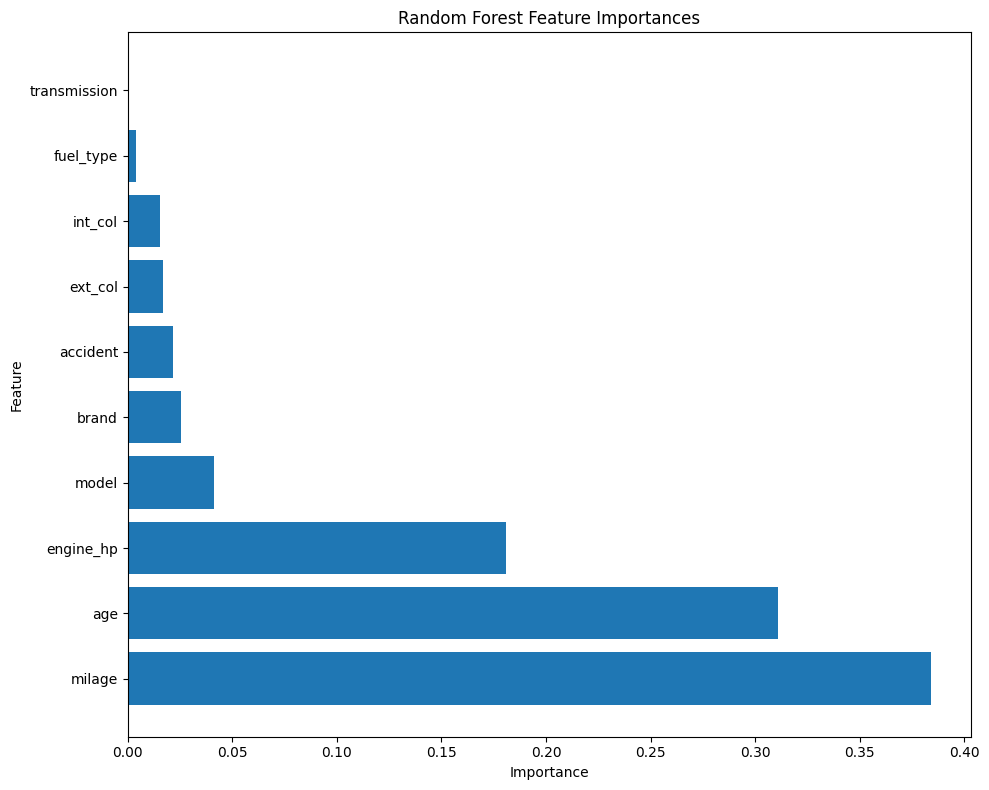

In [31]:
# Get feature importances from your model
importances = rf_best.feature_importances_

# Option 1: If you know your feature names, you can create a list
# Replace these with your actual feature names
feature_names = ["brand","model","milage","fuel_type","transmission","ext_col","int_col","accident","engine_hp","age"]  # Add all your feature names

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# OR Option 2: If you don't have feature names, use indices
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the results
print(feature_importance_df)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()